In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.cluster import KMeans  # Import KMeans class for clustering


In [2]:
# Load the CSV data into a DataFrame
data = pd.read_csv('walmart.csv')

In [3]:
# Print all variables (columns) in the dataset
print(data.columns)

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')


In [4]:
# Convert 'Date' column to datetime type with explicit date format
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')


In [5]:
# Group the data based on the 'Store' column
grouped_data = data.groupby('Store')

In [ ]:
# Loop through each store and perform time series analysis
for store, store_data in grouped_data:
    # Perform time series decomposition for each store's sales data
    result = seasonal_decompose(store_data['Weekly_Sales'], model='additive', period=52)

    # Plot the decomposition for each store
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

    ax1.plot(store_data['Date'], result.trend)  # Use 'Date' column as x-axis for the trend plot
    ax1.set_ylabel('Trend')
    ax1.set_title(f'Weekly Sales Time Series Decomposition - Store {store}')
    ax1.xaxis.set_major_locator(plt.MaxNLocator(6))
    ax1.tick_params(axis='x', rotation=45)

    ax2.plot(store_data['Date'], result.seasonal)
    ax2.set_ylabel('Seasonal')
    ax2.set_xlabel('Date')  # Set x-axis label for the seasonal component plot
    ax2.xaxis.set_major_locator(plt.MaxNLocator(6))
    ax2.tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

In [11]:
# Prepare the data for clustering by aggregating weekly sales for each store
store_sales = grouped_data['Weekly_Sales'].agg(Weekly_Sales='sum', Date='first').reset_index()


In [12]:
# Choose the number of clusters (you can adjust this based on your analysis)
num_clusters = 4

# Select only the weekly sales data for clustering
X = store_sales['Weekly_Sales'].values.reshape(-1, 1)

# Apply k-means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
store_sales['Cluster'] = kmeans.fit_predict(X)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [10]:
print(data.columns)


Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')


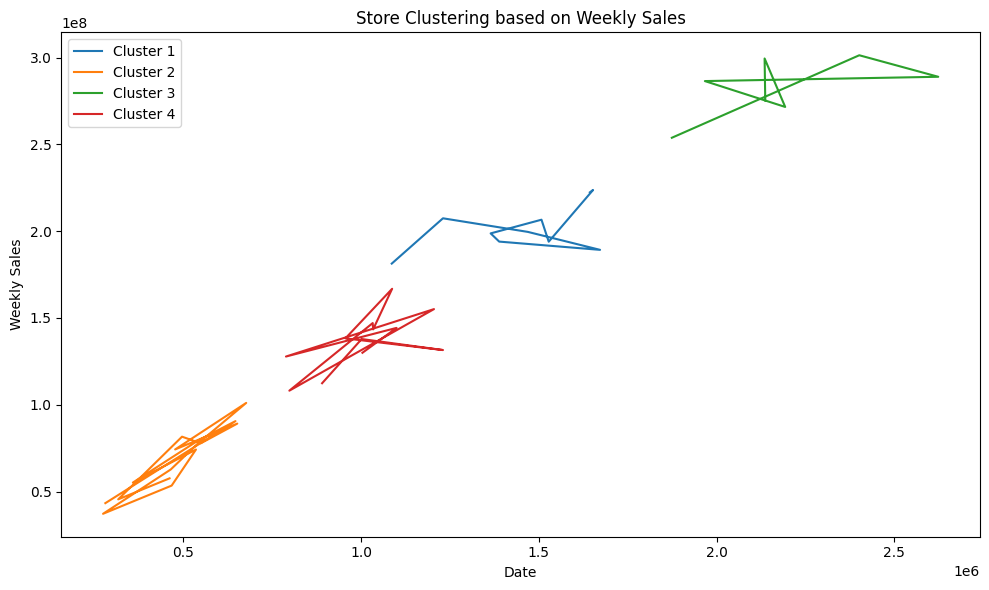

In [13]:
# Plot the clusters
plt.figure(figsize=(10, 6))
for cluster in range(num_clusters):
    cluster_data = store_sales[store_sales['Cluster'] == cluster]
    plt.plot(cluster_data['Date'], cluster_data['Weekly_Sales'], label=f'Cluster {cluster+1}')

plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.title('Store Clustering based on Weekly Sales')
plt.legend()
plt.tight_layout()
plt.show()
